In [24]:
import numpy as np
import pandas as pd

In [100]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data_custom_train.csv")
df_test = pd.read_csv("data_custom_test.csv")

In [101]:
# make predictions from simple model and add it to dataset
model = LinearRegression()

model.fit(X_train, y_train)

reg_predict_train = model.predict(df.drop(columns=["density_percent"]))
reg_predict_test = model.predict(df_test.drop(columns=["density_percent"]))

df['reg_predict'] = reg_predict_train
df_test['reg_predict'] = reg_predict_test

In [102]:
# preparing data for training catboost (splitting test into test and validation in ratio 3:2)
y_train = df["density_percent"]
X_train = df.drop("density_percent", axis=1)

y_df_test = df_test["density_percent"]
X_df_test = df_test.drop("density_percent", axis=1)
X_test, X_val, y_test, y_val = train_test_split(X_df_test, y_df_test,
                                               random_state=777,
                                               test_size=0.4)

In [103]:
# make model and fit it
model = CatBoostRegressor(
    logging_level="Silent",
    random_seed=777
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    plot=True)

# make predictions
pred = model.predict(X_test)
print("Evaluated  model:\n MAPE: {}".format(mean_absolute_percentage_error(y_test, pred)))
print("Evaluated  model:\n RMSE: {}".format(mean_squared_error(y_test, pred)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Evaluated  model:
 MAPE: 0.11297770913648268
Evaluated  model:
 RMSE: 0.008393959635672821


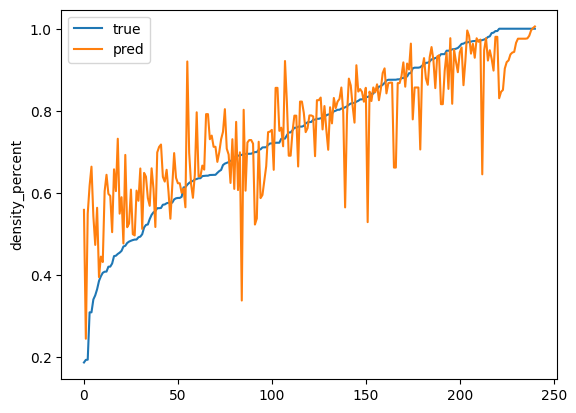

In [81]:
import matplotlib.pyplot as plt

pred = model.predict(X_df_test)
y_df_test, pred = zip(*sorted(zip(y_df_test, pred)))
x = range(len(y_df_test))
plt.plot(x, y_df_test, label="true")
plt.plot(x, pred, label="pred")
plt.ylabel("density_percent")
plt.legend()